<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>
    
    

</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>


# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargamos las librerías que se necesita para el proyecto
import pandas as pd
import seaborn as sns
import numpy as np
import math as mt
from scipy import stats as st
from matplotlib import pyplot as plt

## Cargar datos

In [2]:
# Cargamos los datos de los 5 Datasets de la empresa Megaline y los almacenamos como DataFrame
df_users = pd.read_csv('/datasets/megaline_users.csv')
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')

## Preparar los datos

Los datos para este proyecto se dividen en 5 DataFrames (DF). Vamos a explora cada DataFrame para tener una comprensión inicial de los datos. Si es necesario, se realizarán correcciones requeridas en los DF.

### Tarifas

In [3]:
# Imprimimos la información general/resumida sobre el DataFrame de las tarifas
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprimimos una muestra de los datos para las tarifas
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


En la información general y la muestra de datos del DataFrame `df_plans` (tarifas), se observa lo siguiente:
- El DataFrame contiene solo dos filas, una por cada plan: "surf" y "ultimate".
- Los tipos de datos parecen adecuados en su mayoría: los valores numéricos y moneda están como `int64` o `float64` y el nombre del plan es `object`. Pero se podría convertir las columna `usd_per_gb` y `usd_monthly_pay` a `float64`; debido a que las columnas almacena dinero (dólares) y se debe mantener un estándar con el resto de columnas que almacenan cantidades de dinero. 
- No hay valores ausentes en ninguna columna.

También, se podría agregar una nueva columna donde se indique el plan de datos pero en gigabytes(GB).

#### Corregir datos

Vamos a convertir las columnas `usd_monthly_pay` y `usd_per_gb` en 'float64'

In [5]:
# Convertimos las columnas usd_monthly_pay y usd_per_gb en float64
df_plans['usd_monthly_pay'] = df_plans['usd_monthly_pay'].astype('float')
df_plans['usd_per_gb'] = df_plans['usd_per_gb'].astype('float')

#### Enriquecer los datos

Agregamos la columna `mb_per_month_included_in_gb`, la que indicará el plan de datos en GB (1024mb = 1GB)

In [6]:
# Generamos una columna que indique el plan de datos pero en GB (1GB = 1024mb)
df_plans['mb_in_gb'] = (df_plans['mb_per_month_included'] / 1024).astype('int')
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,mb_in_gb
0,50,15360,500,20.0,10.0,0.03,0.03,surf,15
1,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate,30


### Usuarios/as

In [7]:
# Imprimimos la información general/resumida sobre el DataFrame de usuarios
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Imprime una muestra de datos para usuarios
df_users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


En la información general y la muestra de datos del DataFrame `df_users`, se observa lo siguiente:

- El DataFrame contiene 500 filas.
- Los tipos de datos parecen adecuados en su mayoría: la columna`reg_date` se puede convertir en una columna tipo fecha.
- Existen 466 valores ausentes para la columna `churn_date`, se podría reemplazar por algún valor o fecha. Dado que cuando se extrajo la muestra esos usuarios estaban activos, lo que ocasiono la generación de esos valores ausentes. Veremos si es necesario trabajar con esta columna más adelante; de ser así, se realizarán las transformaciones necesarias.
  
También se puede generar dos nuevas columna a partir de `city`: 
- Nombre de la ciudades.
- Nombre de los estados.

#### Corregir los datos

Convertimos la columna `reg_date` de 'object' a 'datetime' manteniendo el formato de fecha.

In [9]:
# Convertimos 'reg_date' a formato de fecha por si lo necesitemos más adelante
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')

#### Enriquecer los datos

Generamos dos columnas adicionales a partir de `city`(nombre y estado de la ciudad)

In [10]:
# Separamos la columna city en dos nuevas (nombre y estado)
df_users['city_name'] = df_users['city'].str.split(',', expand = True)[0].str.strip()
df_users['city_state'] = df_users['city'].str.split(',', expand = True)[1].str.strip()

### Llamadas

In [11]:
# Imprimimos la información general/resumida sobre el DataFrame de las llamadas
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [12]:
# Imprimimos una muestra de datos para las llamadas
df_calls.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


En la información general y la muestra de datos del DataFrame `df_calls`, se observa lo siguiente:

- El DataFrame contiene 137735 filas.
- Los tipos de datos parecen adecuados en su mayoría: la columna`call_date` se puede convertir en una columna tipo 'datetime'.
- La columna `user_id` tiene el mismo tipo de dato que el DF `df_users`.
- No existen valores ausentes.
  
También se puede generar tres nuevas columnas: 
- La duración redondeado (`rounded_duration`) a su número super, dado que nos indican que si se pasa aunque sea un segundo del minuto, se redondea y se cobra el minuto completo.
- Los meses de las llamadas.
- El número de llamadas  por usuario al mes


#### Corregir los datos

Convertimos la columna `call_date` en formato 'datetime' manteniendo el formato.

In [13]:
# Convertimos los datos de la columna 'call_date' en tipo datetime
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

#### Enriquecer los datos

- Generamos la nueva columna `rounded_duration` que almacena la duración redondeada hacia arriba (sin segundos).
- Generamos la nueva columna `month` que alamacenará el mes de la llamada.
- Generamos la nueva columna `calls_per_month` que almacenará el número de llamadas hechas por un usuario en un mes.

In [14]:
# Creamos una columna que indique la duración redondeada hacia arriba de las llamadas
df_calls['rounded_duration'] = np.ceil(df_calls['duration']).astype('int')

# Creamos la nueva columna que almacenará los meses y convertimos a tipo 'int'
df_calls['month'] = df_calls['call_date'].dt.month
df_calls['month'] = df_calls['month'].astype('int')

# Agrupamos por usuario y mes, luego almacenamos el número de llamadas del mes por usuario y convertimos a 'int'
df_calls['calls_per_month'] = df_calls.groupby(['user_id', 'month'])['user_id'].transform('count')
df_calls['calls_per_month'] = df_calls['calls_per_month'].astype('int')

### Mensajes

In [15]:
# Imprimimos la información general/resumida sobre el DataFrame de los mensajes
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [16]:
# Imprimimos una muestra de datos para los mensajes
df_messages.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


En la información general y la muestra de datos del DataFrame `df_messages`, se observa lo siguiente:

- El DataFrame contiene 76051 filas.
- Los tipos de datos parecen adecuados en su mayoría: la columna`message_date` se puede convertir en una columna tipo 'datetime'.
- La columna `user_id` tiene el mismo tipo de dato que el DF `df_users`.
- No existen valores ausentes.
  
También se puede generar dos columnas adicionales:
- El mes en que se envió los mensajes.
- El número de mensajes de un usuario por mes.

#### Corregir los datos

Convertimos los datos en tipo datetime, mantieniedo el formato de la fecha.

In [17]:
# Convertimos 'message_date' en formato datetime
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')

#### Enriquecer los datos

- Generamos una nueva columna `message_month` que almacenará el mes del envío del mensaje
- Agrupamos por `user_id` y `message_month`, luego contamos los user_id por cada fecha y lo almacenamos en la nueva columna `message_month_user` 

In [18]:
# Creamos la nueva columna que almacenará los meses
df_messages['message_month'] = df_messages['message_date'].dt.month

# Contamos el número de mensajes enviados de un usuario por mes
df_messages['message_month_user'] = df_messages.groupby(['user_id', 'message_month'])['user_id'].transform('count')

### Internet

In [19]:
# Imprimimos la información general/resumida sobre el DataFrame de internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [20]:
# Imprimimos una muestra de datos para el tráfico de internet
df_internet.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


En la información general y la muestra de datos del DataFrame `df_internet`, se observa lo siguiente:

- El DataFrame contiene 104825 filas.
- Los tipos de datos parecen adecuados en su mayoría: la columna`session_date` se puede convertir en una columna tipo 'datetime'.
- La columna `user_id` tiene el mismo tipo de dato que el DF `df_users`.
- No existen valores ausentes.
  
También se puede generar dos nueva columnas: 
- Mes de consumo
- Datos consumidos por mes en GB

#### Corregir los datos

Convertimos los datos de la columna 'session_date' en datetime

In [21]:
# Convertimos la columna 'session_date' en datetime
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format= '%Y-%m-%d')

#### Enriquecer los datos

- Primero vamos a generar una nueva columna `month`, donde se guardará solo el mes, ya que solo se tiene datos del 2018.
- Luego agrupamos por usuario y por la nueva columna generada `month` y sumamos la cantiad de mb usados por mes.
- Por último, creamos una segunda columna `gb_used_month` que almacenará la suma de mb usados por mes (en GB y redondeados hacia arriba).

In [22]:
# Obtenemos una nueva columna con el mes del consumo de internet
df_internet['month'] = df_internet['session_date'].dt.month

# agrupamos los datos de consumo por usuario y mes
df_internet['gb_used_month'] = df_internet.groupby(['user_id', 'month'])['mb_used'].transform('sum')

# Convertimos los datos (mb) de la columna 'gb_used_month' a GB y redondemos hacia arriba
df_internet['gb_used_month'] = np.ceil(df_internet['gb_used_month'] / 1024).astype('int')

## Estudiar las condiciones de las tarifas

Vamos a entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que imprimeremos la información de la tarifa para ver una vez más sus condiciones.

In [23]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,mb_in_gb
0,50,15360,500,20.0,10.0,0.03,0.03,surf,15
1,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate,30


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Los datos fueron revisados y modificados apropiadamente, ahora se puede empezar a trabajar con ellos comodomente
</div>


## Agregar datos por usuario

Ahora que los datos están limpios, agregamos los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Lo que nos facilitará mucho el análisis posterior.

In [24]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
df_calls_per_month = df_calls.groupby(['user_id', 'month'])['calls_per_month'].first().reset_index()
df_calls_per_month

,user_id,month,calls_per_month
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [25]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
#Agrupamos los datos por usuario y por mes, luego sumamos la duración de las llamadas y guardamos en un nuevo DF
df_calls_duration_per_month = df_calls.groupby(['user_id', 'month'])['rounded_duration'].sum().reset_index()

#Renombramos las columnas del nuevo DF para un mejor entendimiento
df_calls_duration_per_month.rename(columns={'rounded_duration': 'minutes_per_month'}, inplace=True)
df_calls_duration_per_month

,user_id,month,minutes_per_month
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426
...,...,...,...
2253,1498,12,339
2254,1499,9,346
2255,1499,10,385
2256,1499,11,308


In [26]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
#Agrupamos los datos por usuario y por mes, luego seleccionamos el primer registro, 
#dado que ya se había calculado anteriormente el número mensual de mensajes por usuario
df_messages_per_month = df_messages.groupby(['user_id', 'message_month'])['message_month_user'].first().reset_index()

#Renombramos las columnas del nuevo DF para un mejor entendimiento
df_messages_per_month.rename(columns={'message_month_user': 'messages_per_month', 'message_month' : 'month'}, inplace=True)
df_messages_per_month

,user_id,month,messages_per_month
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [27]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
#Agrupamos los datos por usuario y por mes, luego seleccionamos el primer registro, 
#dado que ya se había calculado anteriormente el consumo mensual de internet (GB) por usuario.
df_internet_per_month = df_internet.groupby(['user_id', 'month'])['gb_used_month'].first().reset_index()

#Renombramos las columnas del nuevo DF para un mejor entendimiento
df_internet_per_month.rename(columns={'gb_used_month': 'internet_per_month'}, inplace=True)
df_internet_per_month

,user_id,month,internet_per_month
0,1000,12,2
1,1001,8,7
2,1001,9,14
3,1001,10,22
4,1001,11,19
...,...,...,...
2272,1498,12,23
2273,1499,9,13
2274,1499,10,20
2275,1499,11,17


Juntamos los datos agregados en un solo DataFrame, donde habrá un registro que represente lo que consumió un usuario único en un mes determinado.

In [28]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
df_consume_per_month = df_calls_duration_per_month.merge(df_messages_per_month, on=['user_id', 'month'], how='outer')
df_consume_per_month = df_consume_per_month.merge(df_internet_per_month, on=['user_id', 'month'], how='outer')

#Renombramos las columnas del nuevo DF para un mejor entendimiento
df_consume_per_month.rename(columns={'minutes_per_month': 'minutes', 
                                     'messages_per_month' : 'messages', 
                                     'internet_per_month' : 'internet_gb'}, inplace=True)
df_consume_per_month

,user_id,month,minutes,messages,internet_gb
0,1000,12,124.0,11.0,2.0
1,1001,8,182.0,30.0,7.0
2,1001,9,315.0,44.0,14.0
3,1001,10,393.0,53.0,22.0
4,1001,11,426.0,36.0,19.0
...,...,...,...,...,...
2288,1349,12,NaN,61.0,13.0
2289,1361,5,NaN,2.0,2.0
2290,1482,10,NaN,2.0,NaN
2291,1108,12,NaN,NaN,1.0


In [29]:
# Añade la información de la tarifa
# Añadimos los datos necesarios del usuario al DF
df_consume_per_month = df_consume_per_month.merge(df_users[['user_id', 'city_state', 'plan']], on='user_id')

#Agregamos los datos de los planes
df_consume_per_month = df_consume_per_month.merge(df_plans, left_on='plan', right_on='plan_name')

#Eliminamos la columna repetida del nombre del plan
df_consume_per_month.drop(columns=['plan_name'], inplace=True)
df_consume_per_month

,user_id,month,minutes,messages,internet_gb,city_state,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,mb_in_gb
0,1000,12,124.0,11.0,2.0,GA MSA,ultimate,1000,30720,3000,70.0,7.0,0.01,0.01,30
1,1006,11,10.0,15.0,3.0,CA MSA,ultimate,1000,30720,3000,70.0,7.0,0.01,0.01,30
2,1006,12,59.0,139.0,32.0,CA MSA,ultimate,1000,30720,3000,70.0,7.0,0.01,0.01,30
3,1008,10,476.0,21.0,17.0,FL MSA,ultimate,1000,30720,3000,70.0,7.0,0.01,0.01,30
4,1008,11,446.0,37.0,24.0,FL MSA,ultimate,1000,30720,3000,70.0,7.0,0.01,0.01,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1194,11,NaN,62.0,42.0,CA MSA,surf,50,15360,500,20.0,10.0,0.03,0.03,15
2289,1194,12,NaN,56.0,31.0,CA MSA,surf,50,15360,500,20.0,10.0,0.03,0.03,15
2290,1349,10,NaN,76.0,13.0,MA-NH MSA,surf,50,15360,500,20.0,10.0,0.03,0.03,15
2291,1349,11,NaN,72.0,17.0,MA-NH MSA,surf,50,15360,500,20.0,10.0,0.03,0.03,15


In [30]:
# Reemplazamos los valores nulos en las columnas de consumo (minutes, messages, internet_gb) por 0
df_consume_per_month = df_consume_per_month.fillna(0)

Calculamos los ingresos mensuales por usuario (restamos el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplicamos el resultado por el valor del plan de llamadas; añadimos la tarifa mensual en función del plan de llamadas).

In [31]:
# Calcula el ingreso mensual para cada usuario
# Creamos una funcion para realizar el cálculo
def calculate_income(row):
    min_used = row['minutes']
    msj_used = row['messages']
    gb_used = row['internet_gb'] 
    min_plan = row['minutes_included']
    msj_plan = row['messages_included']
    gb_plan = row['mb_in_gb']
    monthly_pay_plan = row['usd_monthly_pay']
    usd_per_gb = row['usd_per_gb']
    usd_per_message = row['usd_per_message']
    usd_per_minute = row['usd_per_minute']

    pay = monthly_pay_plan
    
    if min_used > min_plan:
        pay += ((min_used - min_plan) * usd_per_minute)

    if msj_used > msj_plan:
        pay += ((msj_used - msj_plan) * usd_per_message)

    if gb_used > gb_plan:
        pay += ((gb_used - gb_plan) * usd_per_gb)
    return pay

# Aplicamos la función 'calculate_income' a cada fila del DF
df_consume_per_month['amount_pay'] = df_consume_per_month.apply(calculate_income, axis = 1)

In [32]:
df_consume_per_month

,user_id,month,minutes,messages,internet_gb,city_state,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,mb_in_gb,amount_pay
0,1000,12,124.0,11.0,2.0,GA MSA,ultimate,1000,30720,3000,70.0,7.0,0.01,0.01,30,70.00
1,1006,11,10.0,15.0,3.0,CA MSA,ultimate,1000,30720,3000,70.0,7.0,0.01,0.01,30,70.00
2,1006,12,59.0,139.0,32.0,CA MSA,ultimate,1000,30720,3000,70.0,7.0,0.01,0.01,30,84.00
3,1008,10,476.0,21.0,17.0,FL MSA,ultimate,1000,30720,3000,70.0,7.0,0.01,0.01,30,70.00
4,1008,11,446.0,37.0,24.0,FL MSA,ultimate,1000,30720,3000,70.0,7.0,0.01,0.01,30,70.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1194,11,0.0,62.0,42.0,CA MSA,surf,50,15360,500,20.0,10.0,0.03,0.03,15,290.36
2289,1194,12,0.0,56.0,31.0,CA MSA,surf,50,15360,500,20.0,10.0,0.03,0.03,15,180.18
2290,1349,10,0.0,76.0,13.0,MA-NH MSA,surf,50,15360,500,20.0,10.0,0.03,0.03,15,20.78
2291,1349,11,0.0,72.0,17.0,MA-NH MSA,surf,50,15360,500,20.0,10.0,0.03,0.03,15,40.66


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Buena manera de agregar los datos por usuario, ahora tenemos columnas extras que nos ayudarán con el analisis posterior
</div>


## Estudia el comportamiento de usuario

Calculamos algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibujamos gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas se calculará por tarifa.

In [33]:
# Funcion para crear un gráfico de barras a partir de los dos planes (surf y ultimate)
def graf_barras(df, tipo_serv, title, ylabel):
    df_filter_plan1 = df[df['plan'] == 'surf']
    df_filter_plan1.groupby('month')[tipo_serv].mean().plot(kind='bar', 
                                                                  x='month', 
                                                                  alpha=0.5, 
                                                                figsize=(11, 9), 
                                                                  color='steelblue',
                                                                  edgecolor='black', 
                                                                  rot=0, 
                                                                  grid=True, 
                                                                  legend=True)
    df_filter_plan2 = df[df['plan'] == 'ultimate']
    df_filter_plan2.groupby('month')[tipo_serv].mean().plot(kind='bar', 
                                                                  x='month', 
                                                                  alpha=0.5, 
                                                                figsize=(11, 9), 
                                                                  color='darkorange',
                                                                  edgecolor='black', 
                                                                  rot=0, 
                                                                  grid=True, 
                                                                  legend=True)
    
    plt.title(title)
    plt.xlabel('Mes')
    plt.ylabel(ylabel)
    plt.legend(['Surf', 'Ultimate'])
    plt.show()

In [34]:
# Función para crear histograma a partir de los dos planes (surf y ultimate)
def graf_hist(df,tipo_serv , title, xlabel, bins):
    df_filter_plan1 = df[df['plan'] == 'surf']
    df_filter_plan1[tipo_serv].hist(bins=bins,
                                    alpha=0.5, 
                                    figsize=(9, 6), 
                                    color='steelblue', 
                                    edgecolor='black',
                                    label='Surf', 
                                    grid=True)
    df_filter_plan2 = df[df['plan'] == 'ultimate']
    df_filter_plan2[tipo_serv].hist(bins=bins, 
                                    alpha=0.5, 
                                    figsize=(9, 6), 
                                    color='darkorange', 
                                    edgecolor='black',
                                    label='Ultimate', 
                                    grid=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [35]:
# Función para crear un gráfico de caja a partir de los dos planes (surf y ultimate)
def graf_caja(df, eje_y, title, ylabel):
    sns.boxplot(x = 'plan', y = eje_y, data = df)
    plt.title(title)
    plt.xlabel('Plan')
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!

Gran manera de ahorrar código al crear estas funciones que se pueden utilizar para el analisis de cada una de las secciones
</div>


### Llamadas

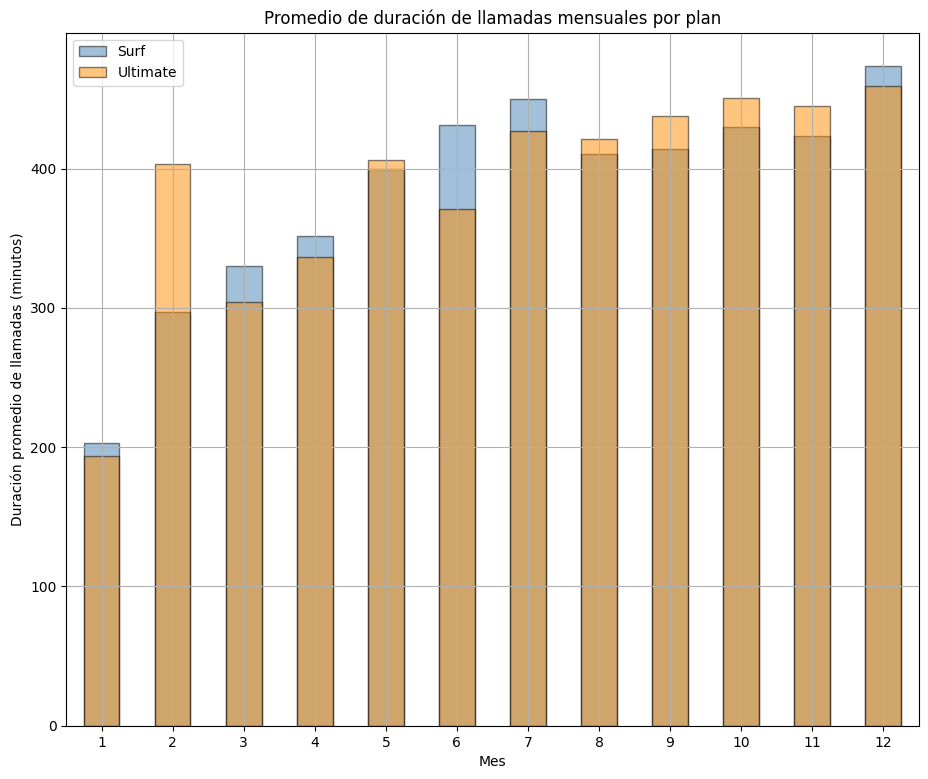

In [36]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
graf_barras(df_consume_per_month, 
            'minutes', 
            'Promedio de duración de llamadas mensuales por plan', 
            'Duración promedio de llamadas (minutos)')

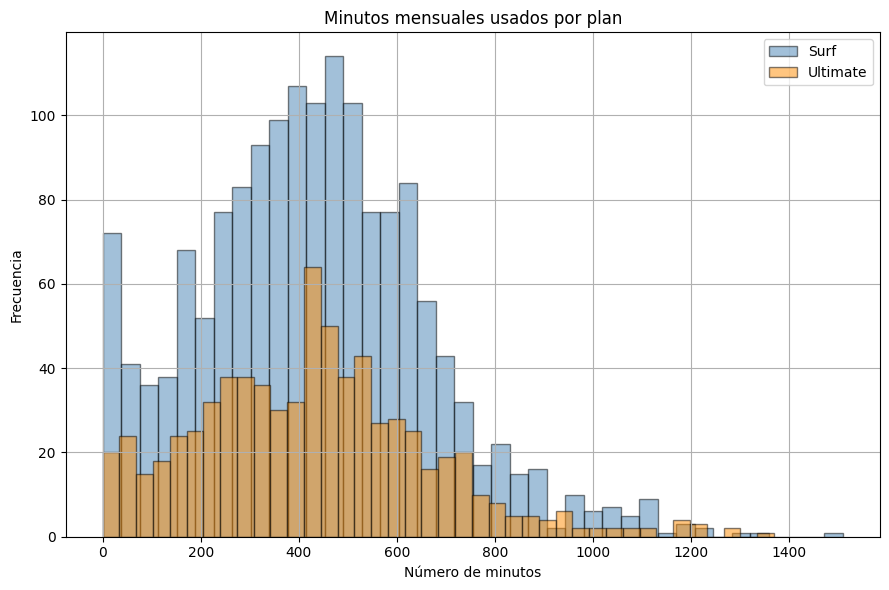

In [37]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
graf_hist(df_consume_per_month, 
          'minutes',
          'Minutos mensuales usados por plan', 
          'Número de minutos',
          40)

Calculamos la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.

In [38]:
# Calcula la media y la varianza de la duración mensual de llamadas
mean_duration_calls = df_consume_per_month.groupby('month')['minutes'].mean().rename('mean_minutes')
var_duration_calls = df_consume_per_month.groupby('month')['minutes'].var().rename('var_minutes')
df_concat = pd.concat([mean_duration_calls, var_duration_calls], axis=1)
df_concat

,mean_minutes,var_minutes
month,,
1,196.666667,13135.866667
2,343.437500,61567.329167
3,321.171429,43378.499160
4,347.197183,45620.531992
5,401.405660,54950.510063
6,411.604167,45086.240822
7,442.472222,64525.781347
8,413.562232,53926.747188
9,421.378571,49735.899181


In [39]:
# Calcula la media y la varianza de la duración de llamadas
mean_duration_calls = df_consume_per_month['minutes'].mean()
var_duration_calls = df_consume_per_month['minutes'].var()
print(f"Media de duración de llamadas: {mean_duration_calls}")
print(f"Varianza de duración de llamadas: {var_duration_calls}")

Media de duración de llamadas: 429.2834714348016
Varianza de duración de llamadas: 55847.17877118995


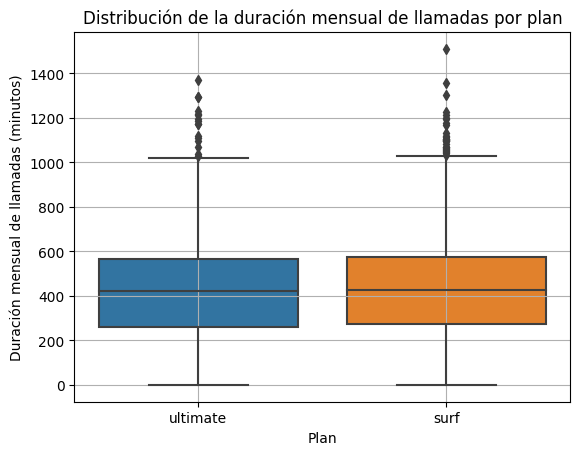

In [40]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
graf_caja(df_consume_per_month, 
          'minutes', 
          'Distribución de la duración mensual de llamadas por plan', 
          'Duración mensual de llamadas (minutos)')

A partir del análisis realizado sobre el comportamiento de los usuarios respecto a las llamadas, se pueden extraer las siguientes conclusiones:

- **Duración y cantidad de llamadas:** Los usuarios de ambos planes (surf y ultimate) presentan distribuciones similares en cuanto a la cantidad y duración de llamadas mensuales. La media y la varianza muestran que, aunque los usuarios del plan ultimate tienden a usar más minutos en promedio, la diferencia no es muy marcada.
- **Distribución y dispersión:** Los diagramas de caja y los histogramas evidencian una gran dispersión en ambos grupos, con la mayoría de los usuarios concentrados por debajo del límite incluido en sus respectivos planes.
- **Comportamiento por plan:** No se observan diferencias drásticas en el comportamiento de llamadas entre los usuarios de los dos planes. La mayoría no suele exceder los minutos incluidos en su paquete, y solo una minoría realiza un uso significativamente mayor.
- **Conclusión general:** El comportamiento respecto a las llamadas no varía considerablemente en función del plan. Ambos grupos muestran patrones de uso similares, aunque el plan ultimate tiene usuarios que en promedio usan ligeramente más minutos.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>

Buena manera de mostrar los datos, se puede ver claramente las tendencias de cada uno de los planes gracias a que has hecho un analisis muy completo de los datos
</div>


### Mensajes

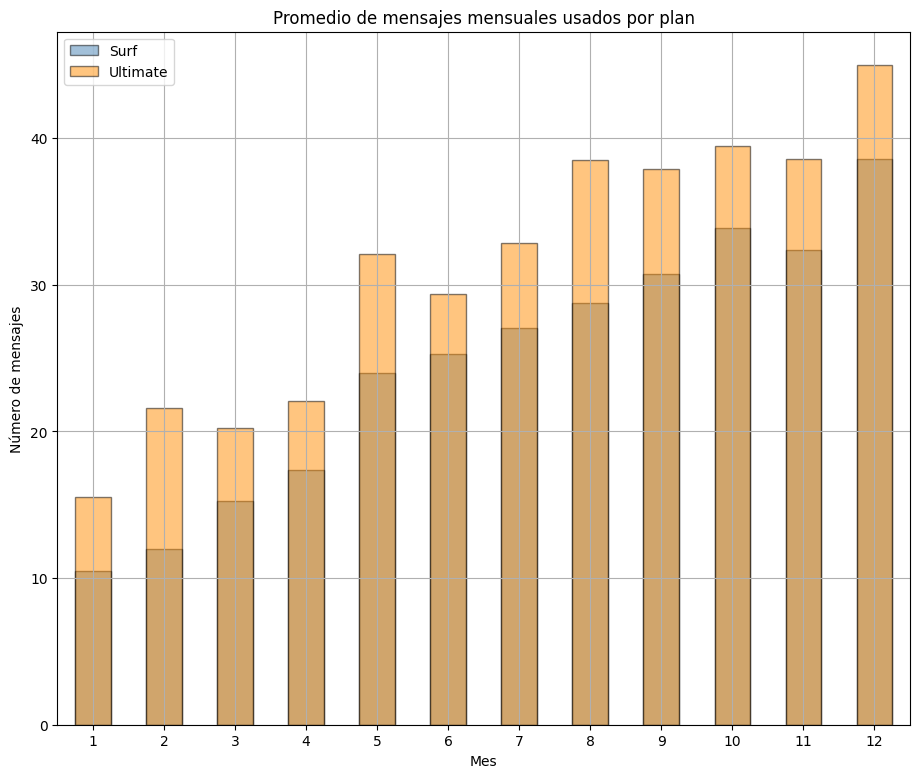

In [41]:
# Comparamos el número promedio de mensajes que tienden a enviar cada mes los usuarios de cada plan
graf_barras(df_consume_per_month, 
            'messages',
            'Promedio de mensajes mensuales usados por plan', 
            'Número de mensajes')

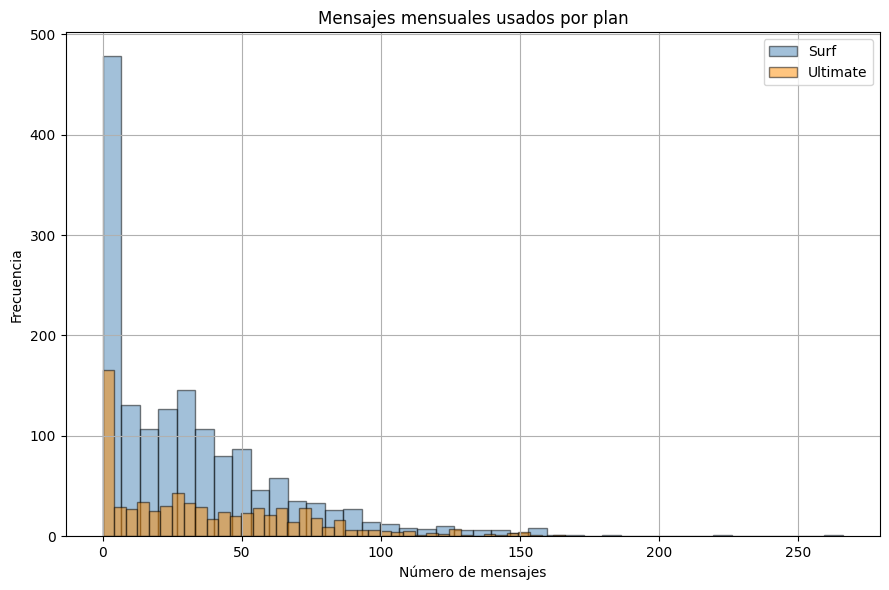

In [42]:
# Compara el número de mensajes mensuales que necesitan los usuarios de cada plan. Traza un histograma.
graf_hist(df_consume_per_month, 
          'messages', 
          'Mensajes mensuales usados por plan', 
          'Número de mensajes',
          40)

In [43]:
# Calcula la media y la varianza del número de mensajes mensuales.
mean_use_msj = df_consume_per_month.groupby('month')['messages'].mean().rename('mean_use_msj')
var_use_msj = df_consume_per_month.groupby('month')['messages'].var().rename('var_use_msj')
df_concat = pd.concat([mean_use_msj, var_use_msj], axis=1)
df_concat

,mean_use_msj,var_use_msj
month,,
1,13.833333,238.966667
2,16.187500,421.229167
3,16.971429,441.734454
4,18.774648,511.148491
5,26.226415,972.291105
6,26.618056,893.706245
7,28.933333,938.051397
8,31.733906,1095.446130
9,32.953571,1025.442281


In [44]:
# Calcula la media y la varianza del uso de los mensajes.
mean_use_msj = df_consume_per_month['messages'].mean()
var_use_msj = df_consume_per_month['messages'].var()
print(f"Media de mensajes mensual: {mean_use_msj}")
print(f"Varianza del uso de mensajes mensuales: {var_use_msj}")

Media de mensajes mensual: 33.166593981683384
Varianza del uso de mensajes mensuales: 1160.7706636557577


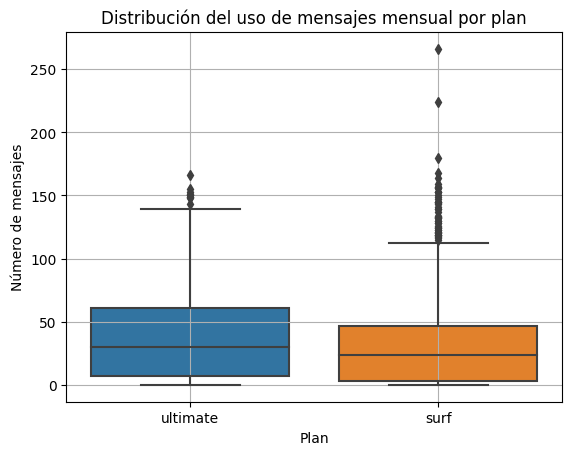

In [45]:
# Traza un diagrama de caja para visualizar la distribución del uso de mensajes mensuales
graf_caja(df_consume_per_month, 
          'messages', 
          'Distribución del uso de mensajes mensual por plan', 
          'Número de mensajes')

A partir del análisis realizado sobre el comportamiento de los usuarios respecto a los mensajes, se pueden extraer las siguientes conclusiones:

- **Cantidad de mensajes enviados:** La mayoría de los usuarios, independientemente del plan, envía pocos mensajes al mes. Tanto la media como la mediana de mensajes mensuales son bajas en ambos planes.
- **Distribución y dispersión:** Los histogramas y diagramas de caja muestran una distribución muy sesgada a la derecha, con muchos usuarios enviando pocos mensajes y unos pocos usuarios enviando cantidades significativamente mayores. La varianza es alta, lo que indica una gran dispersión en el uso de mensajes.
- **Comparación entre planes:** No se observan diferencias significativas en el comportamiento de envío de mensajes entre los usuarios de los planes "surf" y "ultimate". En ambos casos, la mayoría de los usuarios no alcanza el límite de mensajes incluidos en su plan.
- **Conclusión general:** El comportamiento respecto al envío de mensajes es similar en ambos planes. La elección del plan no parece influir de manera significativa en la cantidad de mensajes enviados por los usuarios.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Buenas observaciones!

En esta sección podemos darnos cuenta más claramente de las diferencias entre los planes 
</div>


### Internet

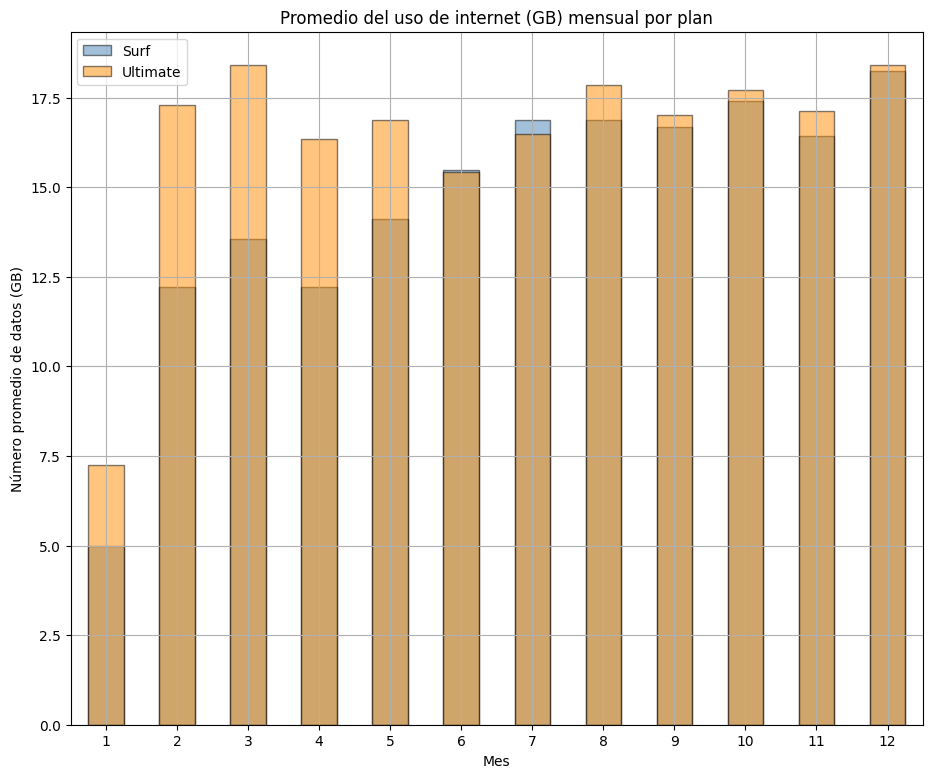

In [46]:
# Comparamos el número promedio internet (GB) que tienden a usar cada mes los usuarios de cada plan
graf_barras(df_consume_per_month, 
            'internet_gb', 
            'Promedio del uso de internet (GB) mensual por plan', 
            'Número promedio de datos (GB)')

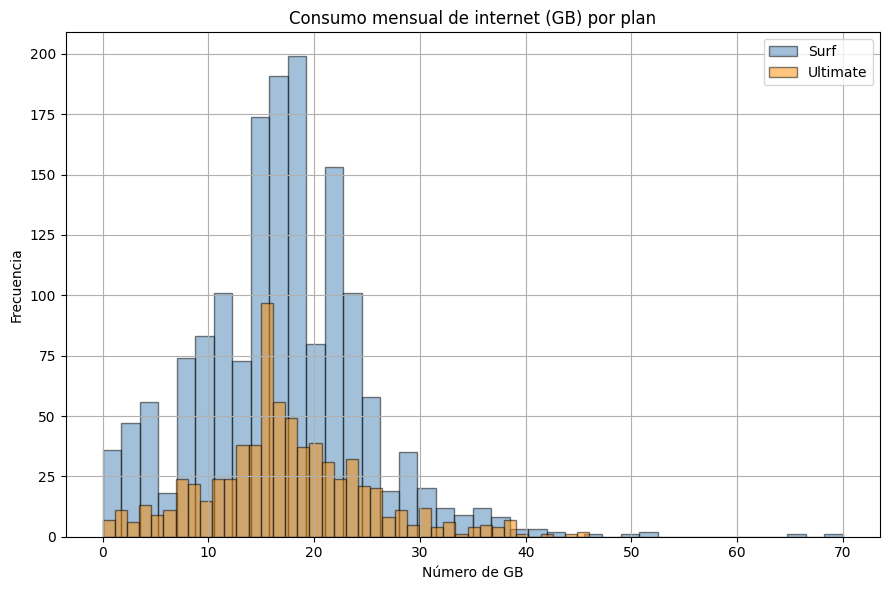

In [47]:
# Compara el internet (GB) mensuales que necesitan los usuarios de cada plan. Traza un histograma.
graf_hist(df_consume_per_month, 
          'internet_gb', 
          'Consumo mensual de internet (GB) por plan', 
          'Número de GB',
          40)

In [48]:
# Calcula la media y la varianza del uso del internet.
mean_use_internet = df_consume_per_month.groupby('month')['internet_gb'].mean().rename('mean_internet_gb')
var_use_internet = df_consume_per_month.groupby('month')['internet_gb'].var().rename('var_internet_gb')
df_concat = pd.concat([mean_use_internet, var_use_internet], axis=1)
df_concat

,mean_internet_gb,var_internet_gb
month,,
1,6.500000,13.900000
2,14.437500,43.995833
3,15.228571,91.710924
4,13.436620,67.449497
5,14.867925,58.077628
6,15.465278,54.208576
7,16.750000,62.065642
8,17.175966,67.274937
9,16.789286,48.482322


In [49]:
# Calcula la media y la varianza del uso del internet.
mean_use_internet = df_consume_per_month['internet_gb'].mean()
var_use_internet = df_consume_per_month['internet_gb'].var()
print(f"Media del uso de internet (GB): {mean_use_internet}")
print(f"Varianza del uso de internet (GB): {var_use_internet}")

Media del uso de internet (GB): 16.870475359790667
Varianza del uso de internet (GB): 60.78033646677916


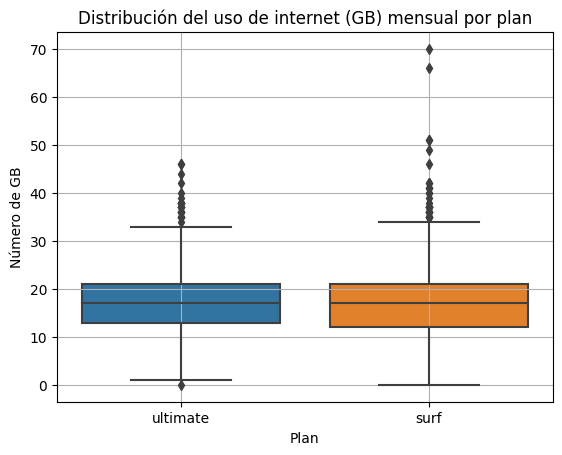

In [50]:
# Traza un diagrama de caja para visualizar la distribución del uso de internet mensual
graf_caja(df_consume_per_month, 
          'internet_gb', 
          'Distribución del uso de internet (GB) mensual por plan', 
          'Número de GB')

A partir del análisis realizado sobre el consumo de tráfico de Internet por parte de los usuarios, se pueden extraer las siguientes conclusiones:

- **Consumo promedio y dispersión:** La media de consumo mensual de Internet es de aproximadamente 16.87 GB, con una varianza de 60.78, lo que indica una dispersión considerable en los datos. Esto significa que, aunque muchos usuarios consumen cerca del promedio, existen varios casos con consumos significativamente mayores o menores.

- **Distribución del consumo:** Los histogramas muestran una distribución sesgada a la derecha, con la mayoría de los usuarios utilizando menos datos y unos pocos usuarios con consumos elevados. La mayoría de los usuarios no supera el límite de datos incluidos en sus planes.

- **Comparación entre planes:** Los gráficos de barras y de caja evidencian que los usuarios del plan "ultimate" tienden a consumir más datos en promedio que los del plan "surf". Sin embargo, en ambos planes la mayoría de los usuarios permanece por debajo del límite incluido, y solo una minoría excede el paquete mensual.

- **Comportamiento por plan:** Aunque el plan "ultimate" permite un mayor consumo de datos y sus usuarios tienden a aprovecharlo más, la diferencia no es extremadamente marcada. El comportamiento general es similar: la mayoría de los usuarios no agota su paquete de datos, independientemente del plan.

- **Conclusión general:** El tipo de plan influye ligeramente en el consumo de Internet, ya que los usuarios con un paquete más grande tienden a usar más datos. Sin embargo, la mayoría de los usuarios, sin importar el plan, no alcanza el límite mensual y el comportamiento de consumo es bastante homogéneo, con una dispersión significativa debida a algunos usuarios con consumos altos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Gracias a estos analisis podemos crear nuevas estrategias para optimizar los planes y dar un mayor beneficio a cambio de mejores ingresos
</div>


## Ingreso

Describe estadísticamente los ingresos de los planes.

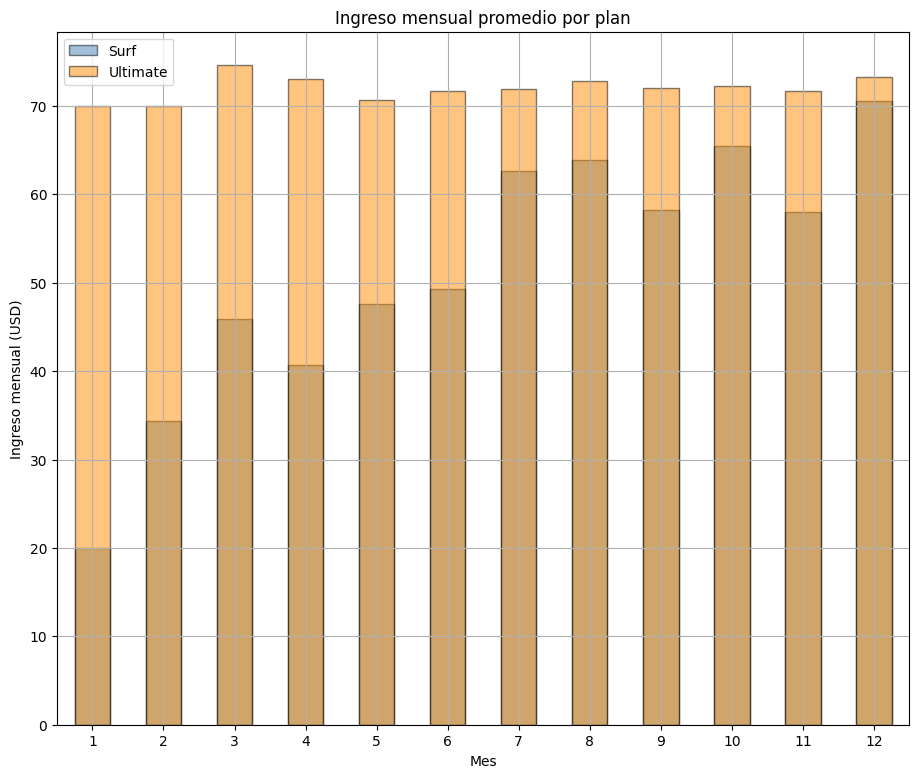

In [51]:
# Compara el ingreso mensual de los usuarios de cada plan. Traza un gráfico de barras para visualizarlo.
graf_barras(df_consume_per_month,
            'amount_pay', 
            'Ingreso mensual promedio por plan', 
            'Ingreso mensual (USD)')

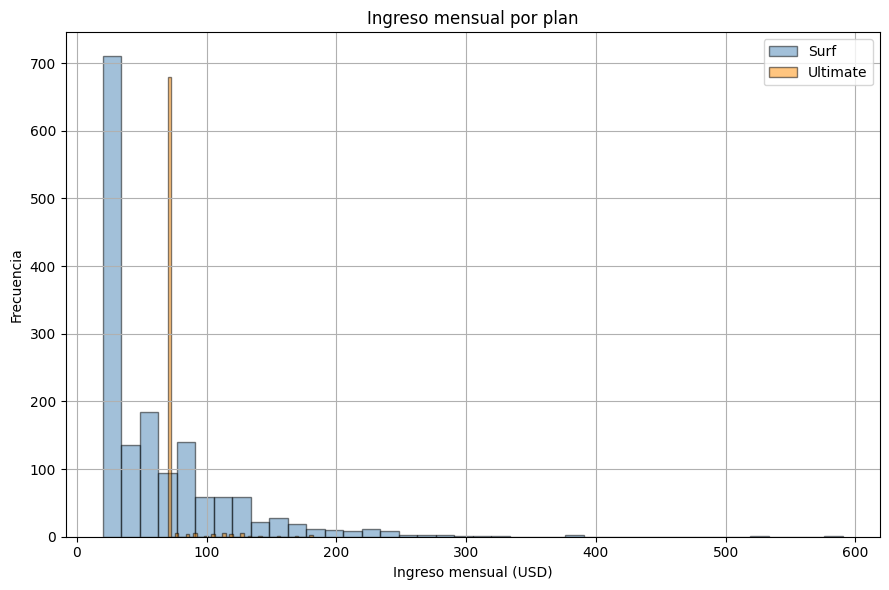

In [52]:
# Compara el ingreso mensuales que de los usuarios de cada plan. Traza un histograma.
graf_hist(df_consume_per_month, 
          'amount_pay', 
          'Ingreso mensual por plan', 
          'Ingreso mensual (USD)',
          40)

In [56]:
# Calcula la media y la varianza del ingreso por plan.
df_consume_per_month_surf = df_consume_per_month[df_consume_per_month['plan'] == 'surf']
df_consume_per_month_ultimate = df_consume_per_month[df_consume_per_month['plan'] == 'ultimate']

mean_income_surf = df_consume_per_month_surf['amount_pay'].mean()
var_income_surf = df_consume_per_month_surf['amount_pay'].var()

mean_income_ultimate = df_consume_per_month_ultimate['amount_pay'].mean()
var_income_ultimate = df_consume_per_month_ultimate['amount_pay'].var()

print(f"Medias de ingresos plan surf: {mean_income_surf}, plan ultimate: {mean_income_ultimate}")
print(f"Varianzas de ingresos plan surf: {var_income_surf}, plan ultimate: {var_income_ultimate}")

Medias de ingresos plan surf: 60.706408137317226, plan ultimate: 72.31388888888888
Varianzas de ingresos plan surf: 3067.835152293878, plan ultimate: 129.8484855509195


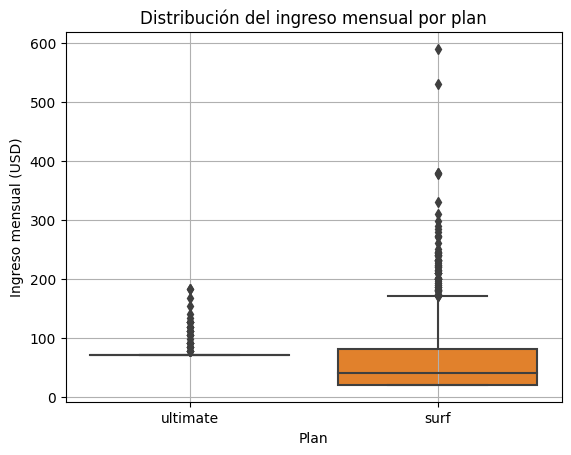

In [57]:
# Traza un diagrama de caja para visualizar la distribución del ingresos por plan
graf_caja(df_consume_per_month, 
          'amount_pay', 
          'Distribución del ingreso mensual por plan', 
          'Ingreso mensual (USD)')

A partir del análisis de los ingresos mensuales por usuario según el plan (surf y ultimate), se pueden extraer las siguientes conclusiones:

- **Ingreso promedio:** El plan "ultimate" genera un ingreso mensual promedio significativamente mayor que el plan "surf". Esto se debe principalmente a su tarifa base más alta, independientemente del consumo adicional de servicios.
- **Varianza y dispersión:** La varianza de los ingresos es mayor en el plan "surf", lo que indica una mayor dispersión en los pagos de los usuarios de este plan. Esto ocurre porque muchos usuarios superan los límites incluidos y pagan cargos adicionales, mientras que en el plan "ultimate" la mayoría paga solo la tarifa fija.
- **Distribución:** El histograma y el diagrama de caja muestran que la mayoría de los usuarios del plan "surf" paga cerca de la tarifa base, pero existe un grupo considerable que paga mucho más por excedentes. En el plan "ultimate", la mayoría de los usuarios paga la tarifa fija, con pocos casos de pagos adicionales.
- **Comparación general:** El plan "ultimate" proporciona ingresos más estables y predecibles, mientras que el plan "surf" puede generar ingresos variables y, en algunos casos, superiores a la tarifa base debido a los cargos por excedentes.

En resumen, el plan "ultimate" es más rentable en términos de ingreso promedio y estabilidad, mientras que el plan "surf" presenta mayor variabilidad y depende más del comportamiento de consumo de los usuarios.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!

Esta es una grafica donde podemos ver diferencias más claras entre los planes, lo que nos ayuda a tomar mejores decisiones
</div>


## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [58]:
# Vamos a probar la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf

# Hipótesis nula (H0): Los ingresos promedio de los usuarios de los planes Ultimate y Surf son iguales
# Hipótesis alternativa (H1): Los ingresos promedio de los usuarios de los planes Ultimate y Surf son diferentes

# Definimos el nivel de significancia
alpha = 0.01

# Creamos dos muestras de ingresos mensuales de los usuarios de cada plan
sample_surf = df_consume_per_month[df_consume_per_month['plan'] == 'surf']['amount_pay']
sample_ultimate = df_consume_per_month[df_consume_per_month['plan'] == 'ultimate']['amount_pay']

# Realizamos la prueba de hipótesis 
results = st.ttest_ind(sample_surf, sample_ultimate, equal_var=False)

# Imprimimos los resultados de la prueba de hipótesis
print(f"Valor p: {results.pvalue}")

# Comparamos el p-valor con el nivel de significancia
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula.")
else:
    print("No rechazamos la hipótesis nula")

Valor p: 3.1703905481135734e-15
Rechazamos la hipótesis nula.


Lo que significa que hay evidencia estadística suficiente para rechazar la hipótesis nula y concluir que hay diferencia entre los ingresos promedio de los planes.

[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [59]:
# Revisamos la existencia del área NY-NJ solicitada para la hipótesis
df_users["city_state"].value_counts().sort_index()

AL MSA              4
AZ MSA             11
CA MSA             78
CO MSA              9
CT MSA              6
DC-VA-MD-WV MSA    11
FL MSA             25
GA MSA             14
HI MSA              5
IL-IN-WI MSA       19
IN MSA              6
KY-IN MSA           5
LA MSA              9
MA-NH MSA          12
MD MSA              4
MI MSA             16
MN-WI MSA          11
MO-IL MSA           3
MO-KS MSA           2
NC MSA              2
NC-SC MSA           8
NE-IA MSA           2
NM MSA              2
NV MSA              7
NY MSA              6
NY-NJ-PA MSA       80
OH MSA              9
OH-KY-IN MSA        8
OK MSA              6
OR-WA MSA           8
PA MSA              5
PA-NJ-DE-MD MSA    17
RI-MA MSA           3
SC MSA              7
TN MSA             12
TN-MS-AR MSA        2
TX MSA             39
UT MSA              3
VA MSA              4
VA-NC MSA           4
WA MSA             13
WI MSA              3
Name: city_state, dtype: int64

In [60]:
#Probamos la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.
# Hipótesis nula (H0): El ingreso promedio de los usuarios del área NY-NJ es igual al de los usuarios de otras regiones
# Hipótesis alternativa (H1): El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones 

# Definimos el nivel de significancia
alpha = 0.05

# Creamos dos muestras de ingresos mensuales de los usuarios de cada región
# No se encontró en el estado 'city_state' de los usuarios el valor 'NY-NJ', por lo cual se reemplazó por 'NY-NJ-PA MSA'
sample_ny_nj = df_consume_per_month[df_consume_per_month['city_state'] == 'NY-NJ-PA MSA']['amount_pay']
sample_other = df_consume_per_month[df_consume_per_month['city_state'] != 'NY-NJ-PA MSA']['amount_pay']

# Realizamos la prueba de hipótesis 
results = st.ttest_ind(sample_ny_nj, sample_other, equal_var=False)

# Imprimimos los resultados de la prueba de hipótesis
print(f"Valor p: {results.pvalue:.20f}")

# Comparamos el p-valor con el nivel de significancia
if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula.')
else:
    print('No rechazamos la hipótesis nula.')

Valor p: 0.03352561588530031389
Rechazamos la hipótesis nula.


Lo que significa que hay suficiente evidencia estadística para rechazar la hipótesis nula y concluir que los ingresos promedio son diferentes entre el área NY-NJ y el resto.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!

La aplicación de las pruebas de hipotesis me parece acertada, seleccionando los datos y valores correctos
</div>


## Conclusión general


1. **Limpieza y transformación de datos**:
    - Se convirtieron las columnas de fechas a tipo `datetime` para facilitar el análisis temporal.
    - Se crearon columnas adicionales para enriquecer los datos, como el mes de cada registro y el consumo mensual por usuario.
    - Se agruparon y sumaron los datos de llamadas, mensajes e internet por usuario y mes, permitiendo un análisis consolidado y comparativo.

2. **Suposiciones y decisiones de procesamiento**:
    - Los valores ausentes en las columnas de consumo se reemplazaron por 0, asumiendo que la ausencia de registros implica ausencia de consumo.
    - Para el cálculo de minutos de llamadas, se redondeó cada llamada hacia arriba, siguiendo la política de cobro de la compañía.
    - El consumo de internet se transformó de MB a GB y se redondeó hacia arriba para reflejar la facturación real y siguiendo la política de cobro de la compañía.

3. **Cálculo de ingresos**:
    - Se diseñó una función para calcular el ingreso mensual por usuario, considerando los límites incluidos en cada plan y los cargos por excedentes.
    - Se fusionaron los datos de consumo con la información de los planes y usuarios para obtener un DataFrame final con todos los datos relevantes.

4. **Análisis descriptivo**:
    - Se analizaron y graficaron los patrones de consumo (llamadas, mensajes, internet) por tipo de plan, observando que la mayoría de los usuarios no supera los límites incluidos.
    - Se calcularon medias y varianzas para cada tipo de consumo y para los ingresos, identificando diferencias en la dispersión y el comportamiento entre planes.

5. **Comparación de planes**:
    - El plan "ultimate" genera ingresos promedio más altos y estables, mientras que el plan "surf" presenta mayor variabilidad debido a los cargos por excedentes.
    - Los usuarios del plan "ultimate" tienden a consumir más datos, pero en general, la mayoría de los usuarios de ambos planes no agota sus paquetes mensuales.

6. **Pruebas estadísticas**:
    - Se realizaron pruebas de hipótesis para comparar los ingresos promedio entre planes y entre regiones (NY-NJ vs. otras), utilizando pruebas t de Student con varianzas desiguales y un nivel de significancia de 0,01 y 0,05.
    - Se encontró evidencia estadística de que los ingresos promedio entre los planes "surf" y "ultimate" son diferentes, 
    - Se encontró evidencia estadística de que el ingreso promedio del área NY-NJ difiere del resto.

7. **Limitaciones**:
    - El análisis se basa en datos de un solo año y no considera posibles tendencias a largo plazo.

**Con respecto a la pregunta inicial del proyecto**, La tarifa **"ultimate"** genera más ingresos promedio que la tarifa **"surf"**.

- **Ingreso promedio plan surf:** 60.71 USD
- **Ingreso promedio plan ultimate:** 72.31 USD

Esto se observa en la variable `mean_income_surf` (60.71) y `mean_income_ultimate` (72.31), así como en los análisis y gráficos realizados. Además, la prueba estadística confirma que la diferencia es significativa. Por lo tanto, el plan **ultimate** es el que genera más ingresos mensuales por usuario.

## Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un muy buen trabajo al desarrollar este proyecto, las observaciones que has hecho a lo largo del mismo han servido para tomar acción en los pasos posteriores, terminando en resultados positivos.

Este es un proyecto que nos adentra mucho en los analisis que se hacen recurrentemente en las compañías donde se obtiene información para tomar decisiones sobre el negocio que impactan directamente los ingresos, lo has hecho bastante bien!

Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!    
</div>


<div class="alert alert-block alert-success">
<b>Aspectos positivos del proyecto</b> <a class="tocSkip"></a><br />

- Las observaciones intermedias, así como las conclusiones finales me parecen bastante detalladas
- El uso de las funciones me parece muy bien planteado
- Las graficas utilizadas me parecen del tipo correcto
- El proyecto esta ordenado y limpio
    
</div>
